<a href="https://colab.research.google.com/github/graphlit/graphlit-samples/blob/main/python/Notebook%20Examples/Graphlit_2024_09_14_Publish_Story_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Description**

This example shows how to ingest the text of a story, and compare how different LLMs create a knowledge graph from the elements of the story.

**Requirements**

Prior to running this notebook, you will need to [signup](https://docs.graphlit.dev/getting-started/signup) for Graphlit, and [create a project](https://docs.graphlit.dev/getting-started/create-project).

You will need the Graphlit organization ID, preview environment ID and JWT secret from your created project.

Assign these properties as Colab secrets: GRAPHLIT_ORGANIZATION_ID, GRAPHLIT_ENVIRONMENT_ID and GRAPHLIT_JWT_SECRET.


---

Install Graphlit Python client SDK

In [82]:
!pip install --upgrade graphlit-client

Install Graphviz

In [83]:
!pip install --upgrade graphviz

Initialize Graphlit

In [84]:
import os
from google.colab import userdata
from graphlit import Graphlit
from graphlit_api import input_types, enums, exceptions

os.environ['GRAPHLIT_ORGANIZATION_ID'] = userdata.get('GRAPHLIT_ORGANIZATION_ID')
os.environ['GRAPHLIT_ENVIRONMENT_ID'] = userdata.get('GRAPHLIT_ENVIRONMENT_ID')
os.environ['GRAPHLIT_JWT_SECRET'] = userdata.get('GRAPHLIT_JWT_SECRET')

graphlit = Graphlit()

Define Graphlit helper functions

In [85]:
from typing import List, Optional

async def create_openai_specification(model: enums.OpenAIModels):
    if graphlit.client is None:
        return;

    input = input_types.SpecificationInput(
        name="OpenAI",
        type=enums.SpecificationTypes.EXTRACTION,
        serviceType=enums.ModelServiceTypes.OPEN_AI,
        openAI=input_types.OpenAIModelPropertiesInput(
            model=model
        )
    )

    try:
        response = await graphlit.client.create_specification(input)

        return response.create_specification.id if response.create_specification is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

    return None

async def create_anthropic_specification():
    if graphlit.client is None:
        return;

    input = input_types.SpecificationInput(
        name="Anthropic",
        type=enums.SpecificationTypes.EXTRACTION,
        serviceType=enums.ModelServiceTypes.ANTHROPIC,
        anthropic=input_types.AnthropicModelPropertiesInput(
            model=enums.AnthropicModels.CLAUDE_3_5_SONNET
        )
    )

    try:
        response = await graphlit.client.create_specification(input)

        return response.create_specification.id if response.create_specification is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

    return None

async def ingest_uri(uri: str):
    if graphlit.client is None:
        return;

    try:
        # Using synchronous mode, so the notebook waits for the content to be ingested
        response = await graphlit.client.ingest_uri(uri=uri, is_synchronous=True)

        return response.ingest_uri.id if response.ingest_uri is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

async def get_content(content_id: str):
    if graphlit.client is None:
        return;

    try:
        response = await graphlit.client.get_content(content_id)

        return response.content
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

async def delete_content(content_id: str):
    if graphlit.client is None:
        return;

    _ = await graphlit.client.delete_content(content_id)

async def publish_content(content_id: str, specification_id: str, prompt: str, summary_prompt: Optional[str] = None):
    if graphlit.client is None:
        return;

    try:
        response = await graphlit.client.publish_contents(
            name="Published Summary",
            connector=input_types.ContentPublishingConnectorInput(
               type=enums.ContentPublishingServiceTypes.TEXT,
               format=enums.ContentPublishingFormats.TEXT
            ),
            summary_prompt=summary_prompt,
            summary_specification=input_types.EntityReferenceInput(
                id=specification_id
            ),
            publish_prompt = prompt,
            publish_specification=input_types.EntityReferenceInput(
                id=specification_id
            ),
            filter=input_types.ContentFilter(
                id=content_id
            ),
            is_synchronous=True
        )

        return response.publish_contents if response.publish_contents is not None else None
    except exceptions.GraphQLClientError as e:
        print(str(e))
        return None

async def delete_all_contents():
    if graphlit.client is None:
        return;

    _ = await graphlit.client.delete_all_contents(is_synchronous=True)

In [86]:
from IPython.display import display, Markdown, HTML, Image
import time
from graphviz import Source
import re

# Remove any existing contents; only needed for notebook example
await delete_all_contents()

print('Deleted all contents.')

uri = "https://www.gutenberg.org/cache/epub/236/pg236-images.html"

summary_prompt = """
Identify the top 50 characters or locations (i.e. places) found in the story. Write detailed, verbose bullet points for each.

Identify the top 50 memorable events or relationships which occur between the characters, between the locations, or between characters and locations.

For example, in The Jungle Book, Mowgli is a 'character' and the jungle and the beach are 'locations'.

These details will be later used to generate an overall knowledge graph of the story.
"""
prompt = """
Generate a detailed knowledge graph of the storyline in Graphviz DOT format, relating the top 50 characters and story locations to plot points. Ignore anything unrelated to the storyline.

Nodes should be the characters and locations. Edges should be anything that happened between characters, between the locations, or between characters and locations.

Edges should be labeled to connect nodes, like 'is son of' or 'learned from'.

Make sure to interconnect as many nodes as possible, as relevant to what you can infer from the story.

Nodes should be circles of same size.  Characters should have Light Blue background color, and locations should have Yellow background color. Use a modern font, like Inter.
Use quoted descriptive phrases for nodes and edges, rather than snake case terms. Remember, each line in DOT format needs to end with a semicolon.
"""

Deleted all contents.


Created Anthropic specification [5357d262-8f6c-474d-a2ae-932b357383b3]:


### Publishing Content [c6dfc6c5-4e02-4c34-acaf-1139f8621b93]: The Project Gutenberg eBook of The Jungle Book, by Rudyard Kipling...

### Published with Anthropic [Published Summary]

digraph JungleBook {
  graph [fontname="Inter"];
  node [shape=circle, style=filled, fontname="Inter"];
  
  // Characters (Light Blue)
  "Mowgli" [fillcolor="lightblue"];
  "Bagheera" [fillcolor="lightblue"];
  "Baloo" [fillcolor="lightblue"];
  "Shere Khan" [fillcolor="lightblue"];
  "Akela" [fillcolor="lightblue"];
  "Father Wolf" [fillcolor="lightblue"];
  "Mother Wolf" [fillcolor="lightblue"];
  "Gray Brother" [fillcolor="lightblue"];
  "Kaa" [fillcolor="lightblue"];
  "Hathi" [fillcolor="lightblue"];
  
  // Locations (Yellow)
  "Seeonee Hills" [fillcolor="yellow"];
  "Council Rock" [fillcolor="yellow"];
  "Waingunga River" [fillcolor="yellow"];
  "Cold Lairs" [fillcolor="yellow"];
  "Kanhiwara" [fillcolor="yellow"];
  
  // Relationships and Events
  "Mowgli" -> "Father Wolf" [label="adopted by"];
  "Mowgli" -> "Mother Wolf" [label="adopted by"];
  "Mowgli" -> "Gray Brother" [label="is brother of"];
  "Bagheera" -> "Mowgli" [label="mentors"];
  "Baloo" -> "Mowgli" [label="teache

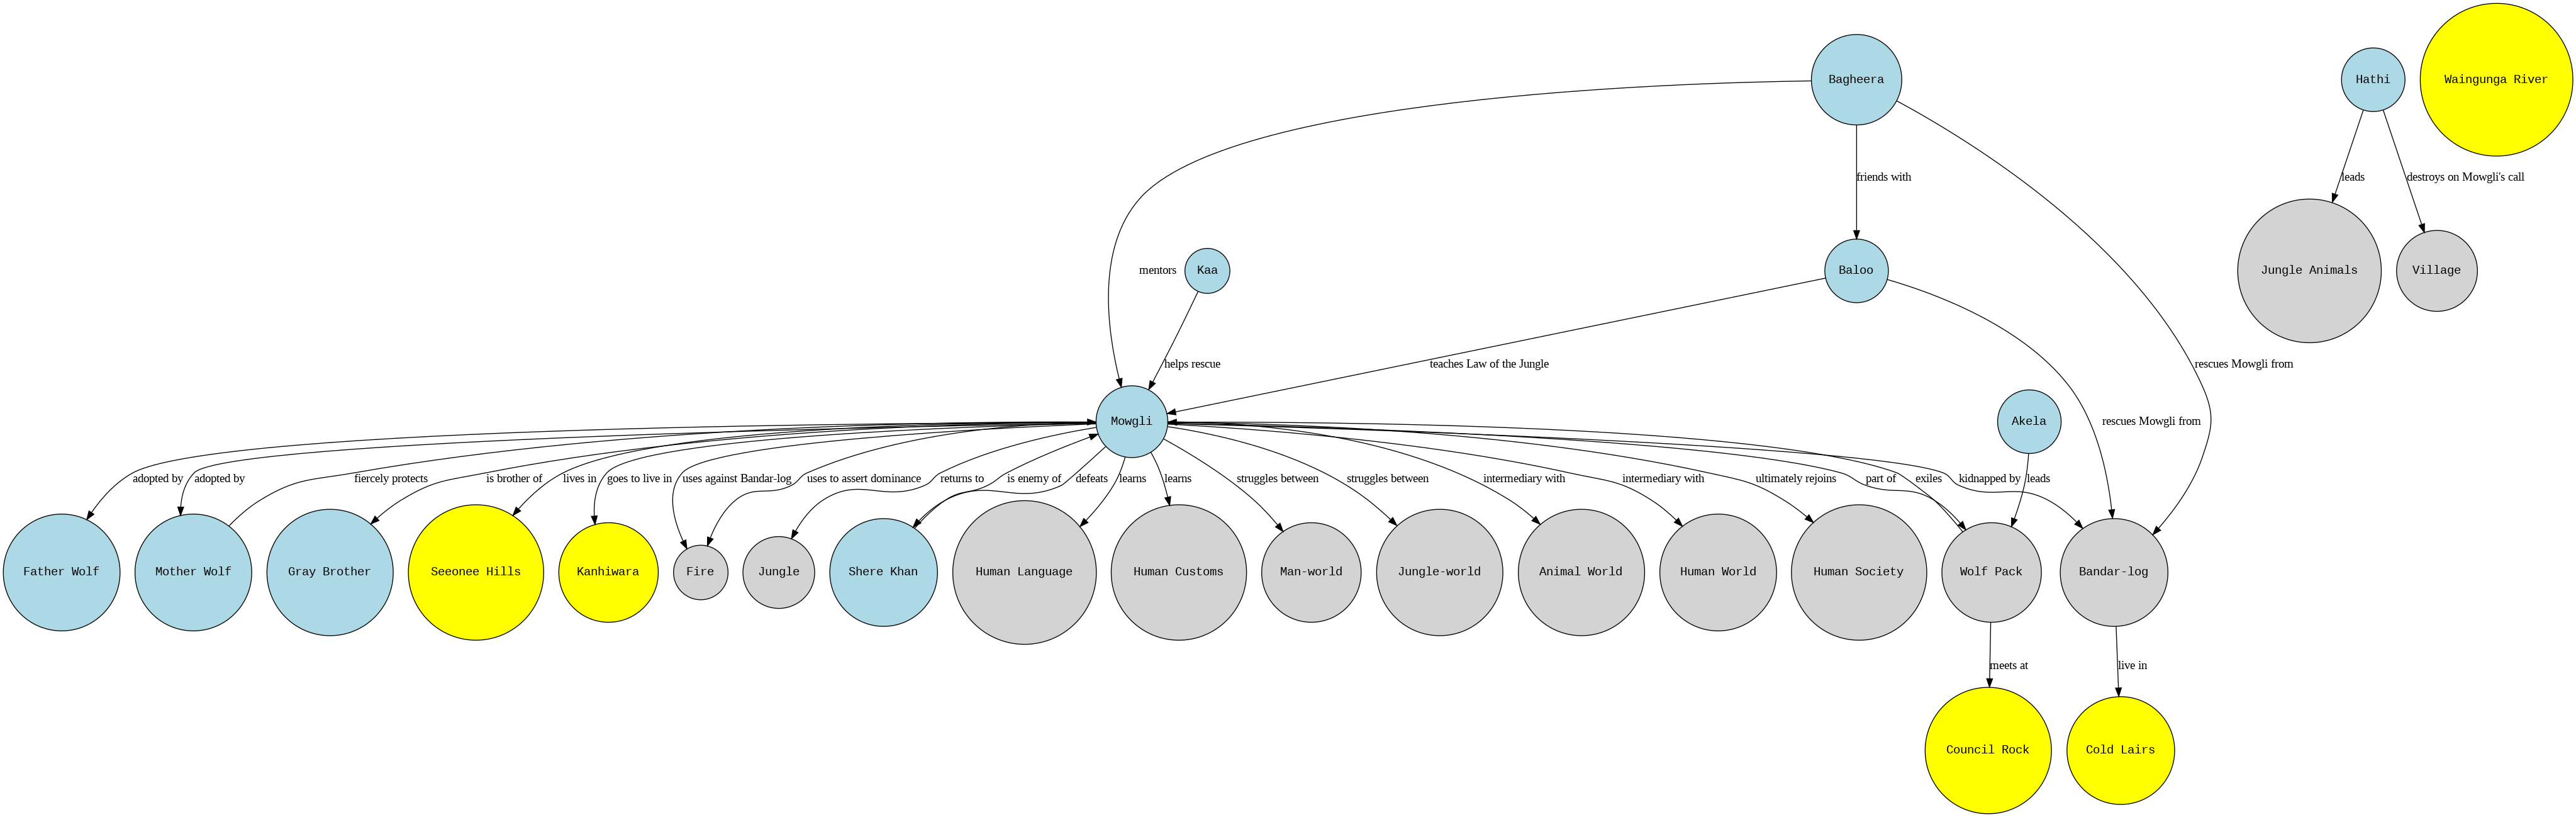

In [87]:
specification_id = await create_anthropic_specification()

if specification_id is not None:
    print(f'Created Anthropic specification [{specification_id}]:')

    content_id = await ingest_uri(uri=uri)

    if content_id is not None:
        content = await get_content(content_id)

        if content is not None:
            display(Markdown(f'### Publishing Content [{content.id}]: {content.name}...'))

            published_content = await publish_content(content_id, specification_id, prompt, summary_prompt)

            if published_content is not None:
                display(Markdown(f'### Published with Anthropic [{published_content.name}]'))

                if published_content.markdown is not None:
                    print(published_content.markdown)

                    src = Source(published_content.markdown)
                    src.render('anthropic_dot', format='png')

                    display(Image('anthropic_dot.png', width=1400))

        await delete_content(content_id)

Created OpenAI GPT-4o specification [6c968d39-525a-454f-8359-c16de777d6ae]:


### Publishing Content [78977fcd-61ce-4c27-a4dc-37a6d4ef59ef]: The Project Gutenberg eBook of The Jungle Book, by Rudyard Kipling...

### Published with OpenAI [Published Summary]

digraph JungleBook {
    node [shape=circle, style=filled, fontname="Inter"];
    
    "Mowgli" [color=lightblue];
    "Shere Khan" [color=lightblue];
    "Baloo" [color=lightblue];
    "Bagheera" [color=lightblue];
    "Kaa" [color=lightblue];
    "Akela" [color=lightblue];
    "Father Wolf" [color=lightblue];
    "Mother Wolf" [color=lightblue];
    "Tabaqui" [color=lightblue];
    "Rikki-Tikki-Tavi" [color=lightblue];
    "Nag" [color=lightblue];
    "Nagaina" [color=lightblue];
    "Darzee" [color=lightblue];
    "Chuchundra" [color=lightblue];
    "Kotick" [color=lightblue];
    "Sea Catch" [color=lightblue];
    "Matkah" [color=lightblue];
    "Sea Vitch" [color=lightblue];
    "Kerick Booterin" [color=lightblue];
    "Patalamon" [color=lightblue];
    "Little Toomai" [color=lightblue];
    "Big Toomai" [color=lightblue];
    "Petersen Sahib" [color=lightblue];
    "Kala Nag" [color=lightblue];
    "Pudmini" [color=lightblue];
    "Machua Appa" [color=lightblue];
    "The Amir of

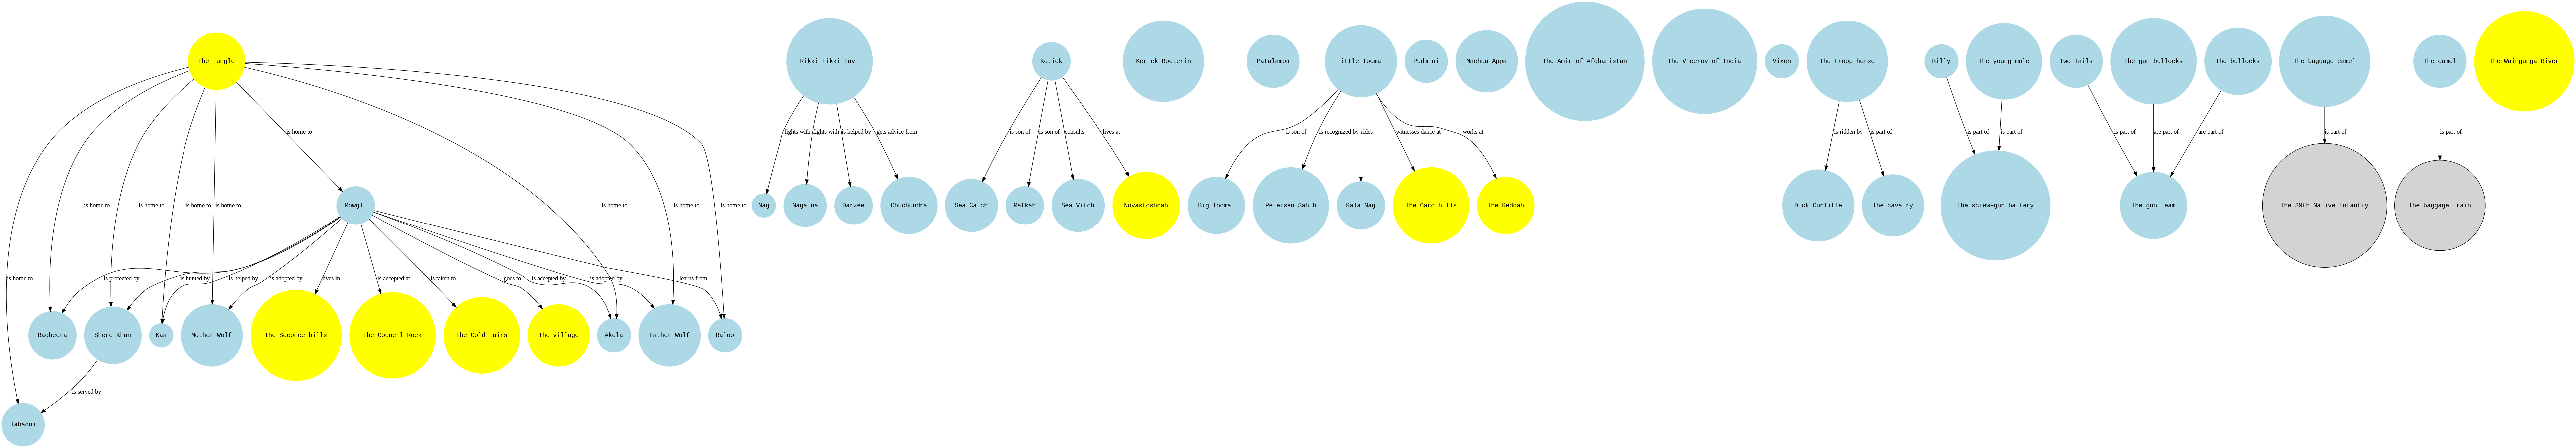

In [88]:
specification_id = await create_openai_specification(enums.OpenAIModels.GPT4O_128K)

if specification_id is not None:
    print(f'Created OpenAI GPT-4o specification [{specification_id}]:')

    content_id = await ingest_uri(uri=uri)

    if content_id is not None:
        content = await get_content(content_id)

        if content is not None:
            display(Markdown(f'### Publishing Content [{content.id}]: {content.name}...'))

            published_content = await publish_content(content_id, specification_id, prompt, summary_prompt)

            if published_content is not None:
                display(Markdown(f'### Published with OpenAI [{published_content.name}]'))

                if published_content.markdown is not None:
                    # HACK: O1 Mini keeps returning --- separator in DOT format
                    markdown = re.sub(r'^\s*---\s*$', '', published_content.markdown, flags=re.MULTILINE)

                    print(markdown)

                    src = Source(markdown)
                    src.render('openai_dot', format='png')

                    display(Image('openai_dot.png', width=1400))

        await delete_content(content_id)

Created OpenAI o1-mini specification [52fcbbd8-f7cb-46e6-8897-b9b26c32417c]:


### Publishing Content [2eb4f828-c684-471e-a4bc-7c12ce7022c1]: The Project Gutenberg eBook of The Jungle Book, by Rudyard Kipling...

### Published with OpenAI [Published Summary]

digraph Storyline {
    node [shape=circle, style=filled, fontname="Inter", fixedsize=true, width=1];
    "Kotick" [fillcolor="LightBlue"];
    "Sea Vitch" [fillcolor="LightBlue"];
    "Sea Cow" [fillcolor="LightBlue"];
    "Rikki-Tikki" [fillcolor="LightBlue"];
    "Human Family" [fillcolor="LightBlue"];
    "Nag" [fillcolor="LightBlue"];
    "Nagaina" [fillcolor="LightBlue"];
    "Little Toomai" [fillcolor="LightBlue"];
    "Kala Nag" [fillcolor="LightBlue"];
    "Mowgli" [fillcolor="LightBlue"];
    "Mother Wolf" [fillcolor="LightBlue"];
    "Shere Khan" [fillcolor="LightBlue"];
    "Baloo" [fillcolor="LightBlue"];
    "Bagheera" [fillcolor="LightBlue"];
    "North Pacific" [fillcolor="Yellow"];
    "South Pacific" [fillcolor="Yellow"];
    "Secluded Island" [fillcolor="Yellow"];
    "Jungle" [fillcolor="Yellow"];
    "Garo Hills" [fillcolor="Yellow"];
    "Human Village" [fillcolor="Yellow"];
    
    "Kotick" -> "Sea Vitch" [label="receives guidance from"];
    "Kotick" -> "North 

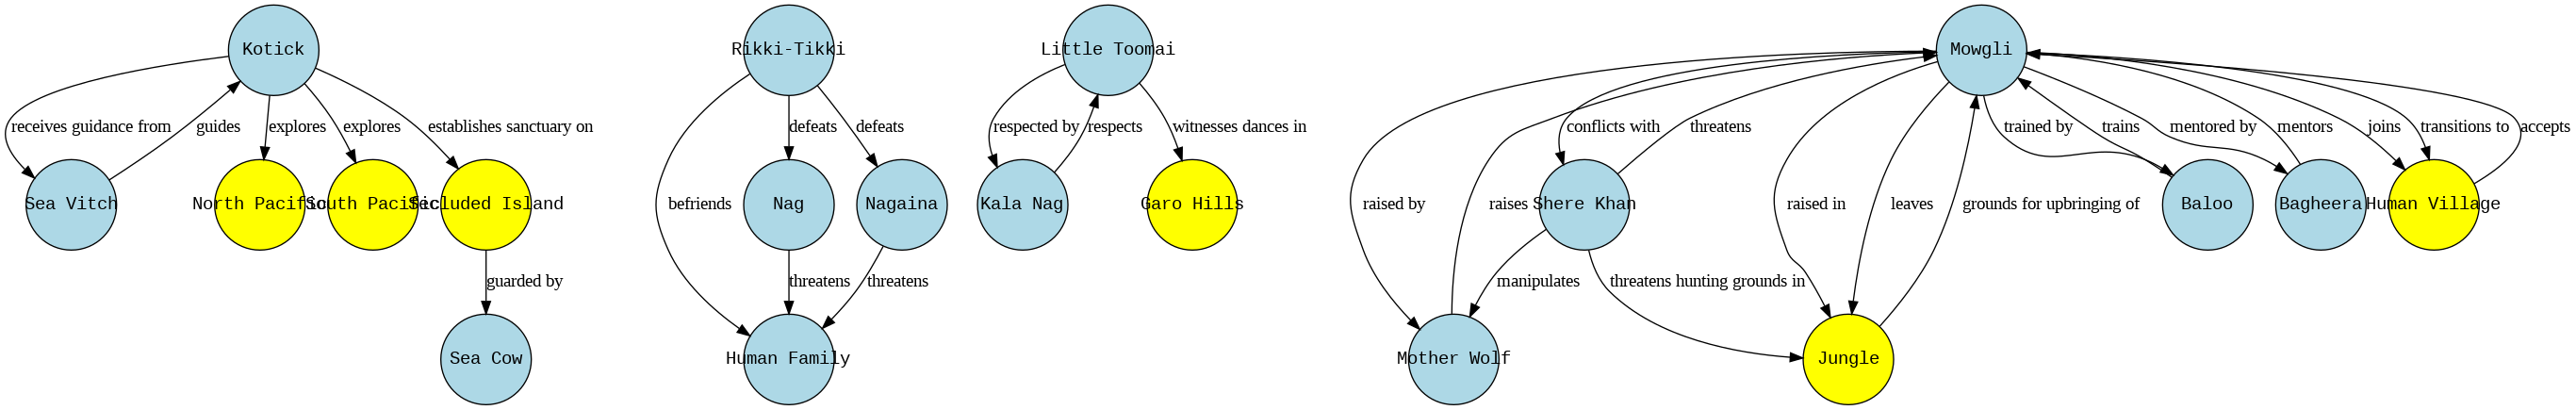

In [89]:
specification_id = await create_openai_specification(enums.OpenAIModels.O1_MINI_128K)

if specification_id is not None:
    print(f'Created OpenAI o1-mini specification [{specification_id}]:')

    content_id = await ingest_uri(uri=uri)

    if content_id is not None:
        content = await get_content(content_id)

        if content is not None:
            display(Markdown(f'### Publishing Content [{content.id}]: {content.name}...'))

            published_content = await publish_content(content_id, specification_id, prompt, summary_prompt)

            if published_content is not None:
                display(Markdown(f'### Published with OpenAI [{published_content.name}]'))

                if published_content.markdown is not None:
                    # HACK: O1 Mini keeps returning --- separator in DOT format
                    markdown = re.sub(r'^\s*---\s*$', '', published_content.markdown, flags=re.MULTILINE)

                    print(markdown)

                    src = Source(markdown)
                    src.render('openai_dot', format='png')

                    display(Image('openai_dot.png', width=1400))

        await delete_content(content_id)